<a href="https://colab.research.google.com/github/the-pinbo/image-denoising/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Restoration without Denoised
##Mini Project in Image Processing
##EC386
###Members


1.   
```
Inbasekaran Perumal
201EC226
inba2002.p@gmail.com
```
2.   
```
Pranav Koundinya
201EC241
pranavmkoundinya@gmail.com
```

###Guide
```
Prof. Sumam David S
```


###Course Instructor
```
Prof. Deepu Vijayasenan
```

In [1]:
#@title Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Tensor flow gpu check
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

To format the code do this 
```
!pip install black[jupyter]
!/content/drive/MyDrive/ImageProcessing/model.ipynb
```



In [3]:
#@title Importing Modules
import os
from matplotlib import image
from shutil import copyfile
import cv2
import seaborn as sns
import random
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras import backend as K
import math
import time 
import pathlib
tf.random.set_seed(0)

In [14]:
#@title Helper functions to navigate directories 

def make_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print("Made dir: ", path)
    else:
        print(f" {path} already exists")

def get_pwd():
    return os.getcwd()

def change_dir(path):
    os.chdir(path)
    print(f"Changed directory to {get_pwd()}")
    

def list_dir(path):
    return os.listdir(path)

In [15]:
#@title Define data root directory
data_root = "/content/drive/MyDrive/ImageProcessing/" #@param ["/content/drive/MyDrive/ImageProcessing/"] {allow-input: true}
change_dir(data_root)

Changed directory to /content/drive/MyDrive/ImageProcessing


In [5]:
#@title Define constant width and height
width = 256 #@param {type:"number"}
height = 256 #@param {type:"number"}

In [6]:
#@title mean and var
mean = 0 #@param {type:"number"}
var = .01 #@param {type:"number"}

In [13]:
#@title Download flickr8k dataset 
control = "yes" #@param ["yes", "no"]
download_dir = data_root + "/dataset"
origin_url = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip" #@param ["https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"] {allow-input: true}
if control == "yes":
    data_root_orig = tf.keras.utils.get_file(
        origin=origin_url,
        cache_dir='.',
        cache_subdir=download_dir,
        extract=True)
    print(f"Downloaded successfully in {data_root_orig}")


1115419746/1115419746 [==============================] - 143s 0us/step
Downloaded successfully in /content/drive/MyDrive/ImageProcessing//dataset/Flickr8k_Dataset.zip


In [7]:
#@title Preprocessing helper functions 
def normalize_scan(image):
    norm_image = cv2.normalize(
        image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F
    )
    return norm_image


def resize_scan(scan, desired_width, desired_height):
    scan = cv2.resize(scan, (desired_height, desired_width))
    return scan


def preprocess_scan(path, width, height):
    scan = cv2.imread(path)
    resized_scan = resize_scan(scan, width, height)
    normalized_resized_scan = normalize_scan(resized_scan)
    return normalized_resized_scan


def generate_img(image):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


In [8]:
#@title Noise helper functions 
def addGaussNoise(image,mean=0,var=.01):
    row, col, ch = image.shape
    sigma = var**0.5
    np.random.seed(int(time.time()))
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return noisy

In [17]:
#@title Define noise dir and clean img dir
ext = "jpg" #@param ["jpg", "png"] {allow-input: true}
clean_img_dir = "/content/drive/MyDrive/ImageProcessing/dataset/flickr8k/Flicker8k_Dataset" #@param ["/content/drive/MyDrive/ImageProcessing/dataset/flickr8k/Flicker8k_Dataset"] {allow-input: true}
noise_dir = "/content/drive/MyDrive/ImageProcessing/dataset/flickr8k/noise" #@param ["/content/drive/MyDrive/ImageProcessing/dataset/flickr8k/noise"] {allow-input: true}
make_dir(noise_dir)
noise_dir = noise_dir + f"/m_{mean}__v_{var}".replace(".","d")
make_dir(noise_dir)
noise_1_dir = noise_dir + "/noise_1"
make_dir(noise_1_dir)
noise_2_dir = noise_dir + "/noise_2"
make_dir(noise_2_dir)

 /content/drive/MyDrive/ImageProcessing/dataset/flickr8k/noise already exists


In [32]:
#@title Define function to preprocess and save 
def preprocess_images(clean_img_dir,noise_1_dir,noise_2_dir):
    clean_img_paths = pathlib.Path(clean_img_dir).glob("*." + ext)
    print(len(list(clean_img_paths)))
    for img_path in tqdm(clean_img_paths, total=len(list(clean_img_paths))):
        img = preprocess_scan(str(img_path), width, height)
        n_img_1 = addGaussNoise(img, mean, var)
        n_img_2 = addGaussNoise(img, mean, var)
        img_name = str(img_path).split('/')[-1]
        print(img_name)
        cv2.imwrite(noise_1_dir + "/" + img_name, n_img_1*255)
        cv2.imwrite(noise_1_dir + "/" + img_name, n_img_2*255)

In [33]:
#@title Pre-Process the train images 
ext = "jpg" #@param ["jpg", "png"] {allow-input: true}
# preprocess and store images in their dir 
preprocess_images(clean_img_dir,noise_1_dir,noise_2_dir)


5887


0it [00:00, ?it/s]


In [ ]:
#@title Helper functions to plot original noise1 and noise2 images 



def plot3(img_path, n_img_1_path, n_img_2_path):
    plt.figure(figsize=(15, 15))
    # plot clean image 
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    # plot noise 1
    plt.subplot(1, 3, 2)
    plt.title("Noisy Image 1")
    plt.imshow(cv2.cvtColor(cv2.imread(n_img_1_path), cv2.COLOR_BGR2RGB))
    # plot noise 2
    plt.subplot(1, 3, 3)
    plt.title("Noisy Image 2")
    plt.imshow(cv2.cvtColor(cv2.imread(n_img_2_path), cv2.COLOR_BGR2RGB))

    plt.show()


def plot_first_n(n):
    clean_img_paths = pathlib.Path(clean_image_file_path_str + "/" + d).glob("*." + ext)
    for _ in range(n):
        img_path = next(clean_img_paths)
        img_name = str(img_path).split('/')[-1]
        n_img_1 = dest_file_path + "/" + d + "/1/" + img_name
        n_img_2 = dest_file_path + "/" + d + "/2/" + img_name
        plotImgs(str(img_path),n_img_1,n_img_2)

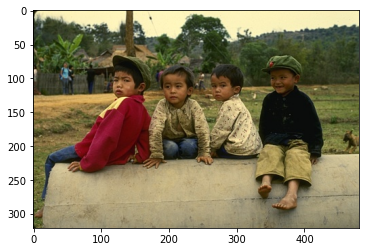

In [ ]:
n = 1 #@param {type:"number"}

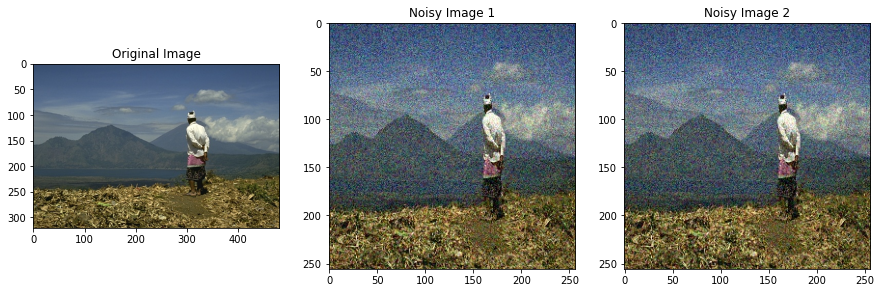

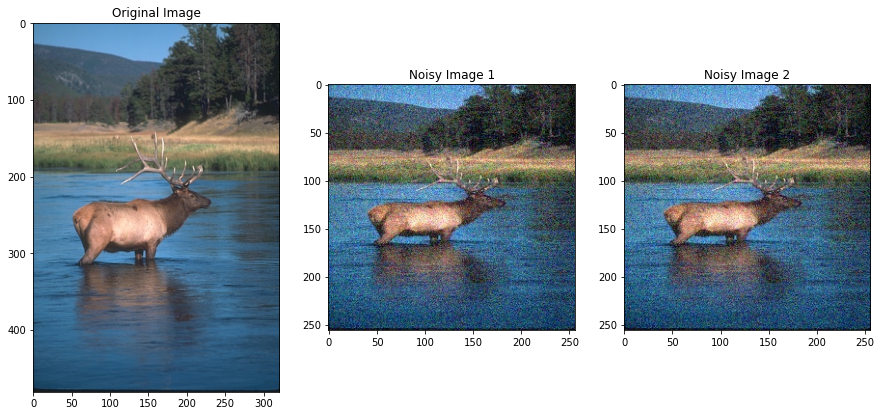

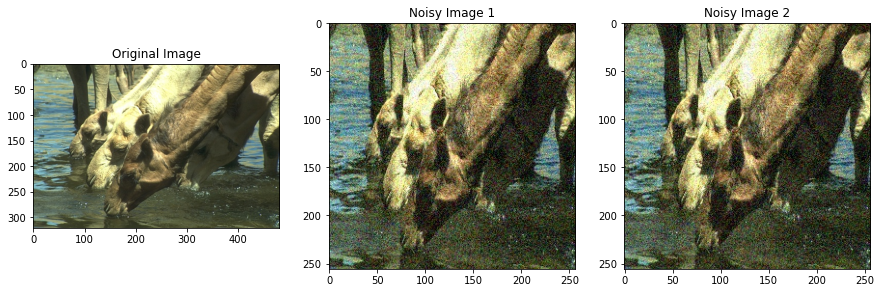

In [ ]:
#@title Default title text




In [ ]:
#@title Loading images
srcPath = "/content/drive/MyDrive/Image Processing Mini Project/dataset" #@param ["/content/drive/MyDrive/ImageProcessing/dataset", "/content/drive/MyDrive/bsd_images/images"] {allow-input: true}
%cd /content/drive/MyDrive/'Image Processing Mini Project'/dataset
train_scan_paths1 = os.listdir(srcPath + "/noise/bsd500_0_0d01/train/1")
train_scan_paths2 = os.listdir(srcPath + "/noise/bsd500_0_0d01/train/2")

test_scan_paths1 = os.listdir(srcPath + "/noise/bsd500_0_0d01/test/1")
test_scan_paths2 = os.listdir(srcPath + "/noise/bsd500_0_0d01/test/2")

# train_scan_paths = [(srcPath + "/train/" + x) for x in train_scan_paths]
# test_scan_paths = [(srcPath + "/test/" + x) for x in test_scan_paths]


print("Train scan 1 with length of: {}".format(len(train_scan_paths1)))
print(train_scan_paths1[:5])
print("Train scan 2 with length of: {}".format(len(train_scan_paths2)))
print(train_scan_paths2[:5])


print("test scan 1 with length of: {}".format(len(test_scan_paths1)))
print(test_scan_paths1[:5])
print("test scan 1 with length of: {}".format(len(test_scan_paths2)))
print(test_scan_paths2[:5])

/content
Train scan 1 with length of: 300
['202000.jpg', '159002.jpg', '196088.jpg', '168084.jpg', '198087.jpg']
Train scan 2 with length of: 300
['202000.jpg', '159002.jpg', '196088.jpg', '168084.jpg', '198087.jpg']
test scan 1 with length of: 100
['104055.jpg', '101027.jpg', '100039.jpg', '100099.jpg', '105027.jpg']
test scan 1 with length of: 100
['104055.jpg', '101027.jpg', '100039.jpg', '100099.jpg', '105027.jpg']


In [ ]:
# #@title Loading images
# srcPath = "/content/drive/MyDrive/Image Processing Mini Project/dataset" #@param ["/content/drive/MyDrive/ImageProcessing/dataset", "/content/drive/MyDrive/bsd_images/images"] {allow-input: true}
# %cd /content/drive/MyDrive/'Image Processing Mini Project'/dataset
# train_scan_paths = os.listdir(srcPath + "/train")
# test_scan_paths = os.listdir(srcPath + "/test")

# train_scan_paths = [(srcPath + "/train/" + x) for x in train_scan_paths]
# test_scan_paths = [(srcPath + "/test/" + x) for x in test_scan_paths]


# print("Train scan with length of: {}".format(len(train_scan_paths)))
# print(train_scan_paths[:5])
# print("test scan with length of: {}".format(len(test_scan_paths)))
# print(test_scan_paths[:5])

In [ ]:
# #@title Adding noise to images before training
# train_gaussian_noise_images = np.array([addGaussNoise(x,mean,var) for x in train_scans])
# test_gaussian_noise_images = np.array([addGaussNoise(x,mean,var) for x in test_scans])

# train_target_images = np.array(train_scans)
# test_target_images = np.array(test_scans)

In [ ]:
#@title Load Images into arrays
p1 = srcPath + "/noise/bsd500_0_0d01/train/1"
os.chdir(p1)
train_gaussian_noise_images1 = np.array([cv2.imread(x) for x in train_scan_paths1])/255

p2 = srcPath + "/noise/bsd500_0_0d01/train/2"
os.chdir(p2)
train_gaussian_noise_images2 = np.array([cv2.imread(x) for x in train_scan_paths2])/255

p3 = srcPath + "/noise/bsd500_0_0d01/test/1"
os.chdir(p3)
test_gaussian_noise_images1 = np.array([cv2.imread(x) for x in test_scan_paths1])/255

p4 = srcPath + "/noise/bsd500_0_0d01/test/2"
os.chdir(p4)
test_gaussian_noise_images2 = np.array([cv2.imread(x) for x in test_scan_paths2])/255

In [ ]:
#@title Defining batch size 
# Batch size
BATCH_SIZE = 128
# Train size
print(train_gaussian_noise_images1.shape)
print(train_gaussian_noise_images2.shape)

(300, 256, 256, 3)
(300, 256, 256, 3)


In [ ]:
#@title Importing modules for training 
from tensorflow.keras.losses import MeanSquaredError
mse = tf.keras.losses.MeanSquaredError()
# mse(train_gaussian_noise_images[0], train_scans[0]).numpy()
from keras import Input, Model, Sequential
from keras import layers
from keras import backend as K
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers.experimental.preprocessing import (
    RandomFlip,
    RandomContrast,
    RandomRotation,
)
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Add
K.clear_session()

In [ ]:
#@title Data augmentation
data_augmentation = Sequential(
    [RandomFlip(mode="horizontal", seed=0), RandomContrast(0.1, seed=0)]
)

In [ ]:
#@title Load a model if saved 
print("Do you want to load an existing model[yes/no]?")
opt = "no" #@param ["yes", "no"]
fileName = "/content/drive/MyDrive/ImageProcessing/dataset/models/baseline.h" #@param ["/content/drive/MyDrive/ImageProcessing/dataset/models/baseline.h"] {allow-input: true}
if opt == "yes":
    from keras import models
    model = models.load_model(fileName)
    print(model.summary())
    # print(model.get_weights())    
    # print(model.opttimizer())  


Do you want to load an existing model[yes/no]?


In [ ]:
#@title U-Net model
def UNet():

    input_img = Input(shape=(256, 256, 3))
    augmentation = data_augmentation(input_img)

    # ============================================================================
    # == ENCODER
    # ============================================================================

    conv_1_a = layers.Conv2D(48, (3, 3), padding="same", use_bias=False)(augmentation)
    l_relu_1_a = layers.LeakyReLU()(conv_1_a)
    conv_1_b = layers.Conv2D(48, (3, 3), padding="same", use_bias=False)(l_relu_1_a)
    l_relu_1_b = layers.LeakyReLU()(conv_1_b)
    maxpool_1 = layers.MaxPooling2D((2, 2), padding="same")(l_relu_1_b)
    print(maxpool_1.shape)

    conv_2 = layers.Conv2D(48, (3, 3), padding="same", use_bias=False)(maxpool_1)
    l_relu_2 = layers.LeakyReLU()(conv_2)
    maxpool_2 = layers.MaxPooling2D((2, 2), padding="same")(l_relu_2)
    print(maxpool_2.shape)

    conv_3 = layers.Conv2D(48, (3, 3), padding="same", use_bias=False)(maxpool_2)
    l_relu_3 = layers.LeakyReLU()(conv_3)
    maxpool_3 = layers.MaxPooling2D((2, 2), padding="same")(l_relu_3)
    print(maxpool_3.shape)

    conv_4 = layers.Conv2D(48, (3, 3), padding="same", use_bias=False)(maxpool_3)
    l_relu_4 = layers.LeakyReLU()(conv_4)
    maxpool_4 = layers.MaxPooling2D((2, 2), padding="same")(l_relu_4)
    print(maxpool_4.shape)

    conv_5_a = layers.Conv2D(48, (3, 3), padding="same", use_bias=False)(maxpool_4)
    l_relu_5_a = layers.LeakyReLU()(conv_5_a)
    maxpool_5 = layers.MaxPooling2D((2, 2), padding="same")(l_relu_5_a)
    print(maxpool_5.shape)

    conv_5_b = layers.Conv2D(48, (3, 3), padding="same", use_bias=False)(maxpool_5)
    encoded = layers.LeakyReLU()(conv_5_b)

    # ============================================================================
    # == DECODER
    # ============================================================================

    upsamp_6 = layers.UpSampling2D((2, 2))(encoded)
    print(upsamp_6.shape)
    concat_6 = tf.concat([upsamp_6, maxpool_4], axis=3)
    print(concat_6.shape)
    conv_6_a = layers.Conv2D(96, (3, 3), padding="same", use_bias=False)(concat_6)
    l_relu_6_a = layers.LeakyReLU()(conv_6_a)
    conv_6_b = layers.Conv2D(96, (3, 3), padding="same", use_bias=False)(l_relu_6_a)
    l_relu_6_b = layers.LeakyReLU()(conv_6_b)

    upsamp_7 = layers.UpSampling2D((2, 2))(l_relu_6_b)
    print(upsamp_7.shape)
    concat_7 = tf.concat([upsamp_7, maxpool_3], axis=3)
    print(concat_7.shape)
    conv_7_a = layers.Conv2D(96, (3, 3), padding="same", use_bias=False)(concat_7)
    l_relu_7_a = layers.LeakyReLU()(conv_7_a)
    conv_7_b = layers.Conv2D(96, (3, 3), padding="same", use_bias=False)(l_relu_7_a)
    l_relu_7_b = layers.LeakyReLU()(conv_7_b)

    upsamp_8 = layers.UpSampling2D((2, 2))(l_relu_7_b)
    print(upsamp_8.shape)
    concat_8 = tf.concat([upsamp_8, maxpool_2], axis=3)
    print(concat_8.shape)
    conv_8_a = layers.Conv2D(96, (3, 3), padding="same", use_bias=False)(concat_8)
    l_relu_8_a = layers.LeakyReLU()(conv_8_a)
    conv_8_b = layers.Conv2D(96, (3, 3), padding="same", use_bias=False)(l_relu_8_a)
    l_relu_8_b = layers.LeakyReLU()(conv_8_b)

    upsamp_9 = layers.UpSampling2D((2, 2))(l_relu_8_b)
    print(upsamp_9.shape)
    concat_9 = tf.concat([upsamp_9, maxpool_1], axis=3)
    print(concat_9.shape)
    conv_9_a = layers.Conv2D(96, (3, 3), padding="same", use_bias=False)(concat_9)
    l_relu_9_a = layers.LeakyReLU()(conv_9_a)
    conv_9_b = layers.Conv2D(96, (3, 3), padding="same", use_bias=False)(l_relu_9_a)
    l_relu_9_b = layers.LeakyReLU()(conv_9_b)

    upsamp_10 = layers.UpSampling2D((2, 2))(l_relu_9_b)
    print(upsamp_10.shape)
    concat_10 = tf.concat([upsamp_10, input_img], axis=3)
    print(concat_10.shape)
    conv_10_a = layers.Conv2D(64, (3, 3), padding="same", use_bias=False)(concat_10)
    l_relu_10_a = layers.LeakyReLU()(conv_10_a)
    conv_10_b = layers.Conv2D(32, (3, 3), padding="same", use_bias=False)(l_relu_10_a)
    l_relu_10_b = layers.LeakyReLU()(conv_10_b)

    decoded = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(
        l_relu_10_b
    )
    print(decoded.shape)

    return Model(input_img, decoded)

In [ ]:
#@title Red-Net model
def RedNet():
    il = Input(shape=(256, 256, 3))
    augmentation = data_augmentation(il)

    # ============================================================================
    # == ENCODER
    # ============================================================================

    l1 = Conv2D(
        16,
        (3, 3),
        padding="same",
        activation="relu",
    )(augmentation)
    l2 = Conv2D(16, (3, 3), padding="same", activation="relu")(l1)
    l3 = Conv2D(16, (3, 3), padding="same", activation="relu")(l2)
    l4 = Conv2D(16, (3, 3), padding="same", activation="relu")(l3)
    l5 = Conv2D(16, (3, 3), padding="same", activation="relu")(l4)

    # ============================================================================
    # == DECODER
    # ============================================================================

    l6 = Conv2DTranspose(16, (3, 3), padding="same", activation="relu")(l5)
    s1 = Add()([l6, l4])
    l7 = Conv2DTranspose(16, (3, 3), padding="same", activation="relu")(s1)
    s2 = Add()([l7, l3])
    l8 = Conv2DTranspose(16, (3, 3), padding="same", activation="relu")(s2)
    s3 = Add()([l8, l2])
    l9 = Conv2DTranspose(16, (3, 3), padding="same", activation="relu")(s3)
    s4 = Add()([l9, l1])
    l10 = Conv2DTranspose(3, (3, 3), padding="same", activation="relu")(s4)

    model = Model(il, l10)
    return model

In [ ]:
#@title instantiation of model
architecture = "RedNet" #@param ["RedNet", "UNet"]
autoencoder = eval(architecture)()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['sequential[0][0]']             
                                )                                                                 
                                                                                              

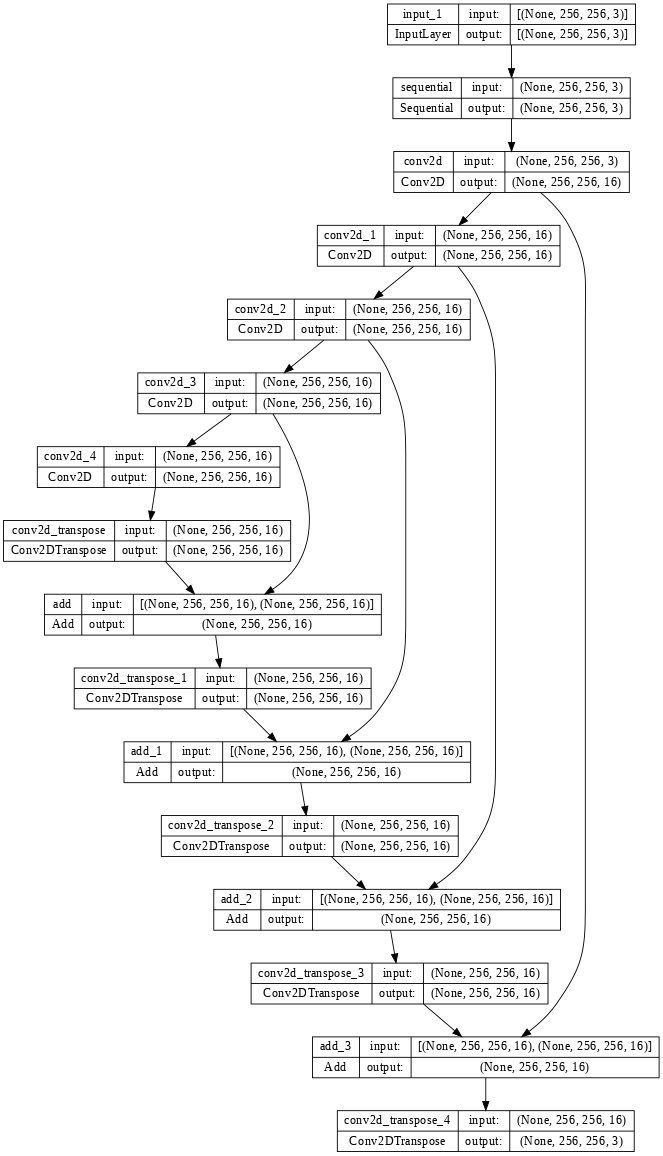

In [ ]:
#@title Plot model
from tensorflow.keras.utils import plot_model
autoencoder.summary()
plot_model(autoencoder, show_shapes=True, dpi=64)

In [ ]:
#@title Defining optimizers
from tensorflow.keras.optimizers import Adam

autoencoder_optimizer = Adam(0.0001, beta_1=0.9)
autoencoder.compile(optimizer="adam", loss=MeanSquaredError(), metrics=["accuracy"])

In [ ]:
#@title Model Checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "my_model/model_gauss_10"
monitor = "val_accuracy"
mode = "max"
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor=monitor,
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode=mode,
)

In [ ]:
#@title Train the model 
EPOCHS = 40
history = autoencoder.fit(train_gaussian_noise_images1, train_gaussian_noise_images2,
                epochs=EPOCHS,
                shuffle=True,
                validation_data=(test_gaussian_noise_images1, test_gaussian_noise_images2), callbacks=[model_checkpoint])

Epoch 1/40


10/10 [==============================] - ETA: 0s - loss: 0.1093 - accuracy: 0.3651
Epoch 1: val_accuracy improved from -inf to 0.36561, saving model to my_model/model_gauss_10
10/10 [==============================] - 6s 436ms/step - loss: 0.1093 - accuracy: 0.3651 - val_loss: 0.0284 - val_accuracy: 0.3656
Epoch 2/40
10/10 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.3911
Epoch 2: val_accuracy improved from 0.36561 to 0.40234, saving model to my_model/model_gauss_10
10/10 [==============================] - 4s 404ms/step - loss: 0.0442 - accuracy: 0.3911 - val_loss: 0.0199 - val_accuracy: 0.4023
Epoch 3/40
10/10 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.3797
Epoch 3: val_accuracy improved from 0.40234 to 0.40440, saving model to my_model/model_gauss_10
10/10 [==============================] - 4s 408ms/step - loss: 0.0402 - accuracy: 0.3797 - val_loss: 0.0196 - val_accuracy: 0.4044
Epoch 4/40
10/10 [==============================] -

In [ ]:
#@title Helper function to show results 
def show_results(log):
    val_loss = log.history["val_loss"]
    val_acc = log.history["val_accuracy"]

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    ax1, ax2 = axes
    ax1.plot(log.history["loss"], label="train")
    ax1.plot(val_loss, label="test")
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("loss")
    ax2.plot(log.history["accuracy"], label="train")
    ax2.plot(val_acc, label="test")
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("accuracy")
    for ax in axes:
        ax.legend()

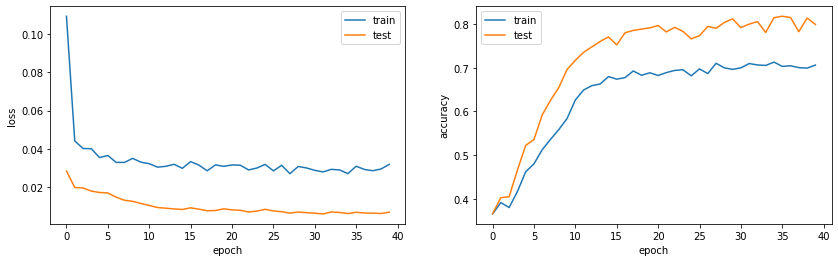

In [ ]:
#@title Show results 
show_results(history)

In [ ]:
#@title Generate Images 
def generate_images(model, test_input, tar):
    prediction = model.predict(test_input.reshape(-1, 256, 256, 3))
    plt.figure(figsize=(15, 15))

    display_list = [
        test_input.astype("float32"),
        tar.astype("float32"),
        prediction.reshape(256, 256, 3),
    ]
    title = ["Input Image", "Ground Truth", "Predicted Image"]

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.title(title[i])

        plt.axis("off")
        plt.imshow(cv2.cvtColor(display_list[i], cv2.COLOR_BGR2RGB))


    plt.show()

1/1 [==============================] - 0s 311ms/step


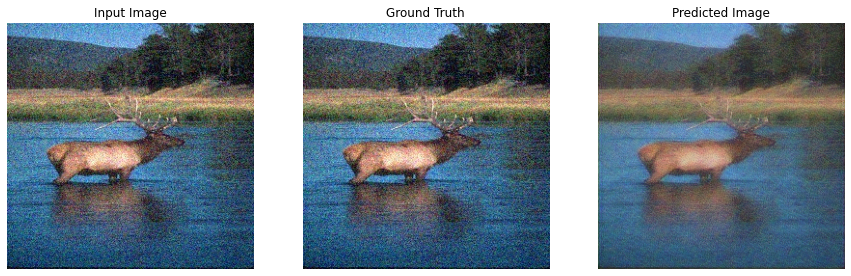

1/1 [==============================] - 0s 34ms/step


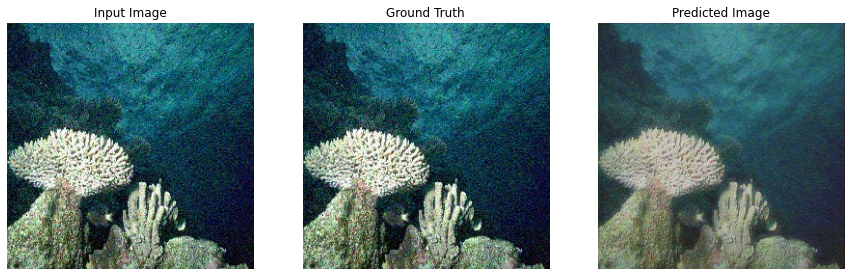

1/1 [==============================] - 0s 46ms/step


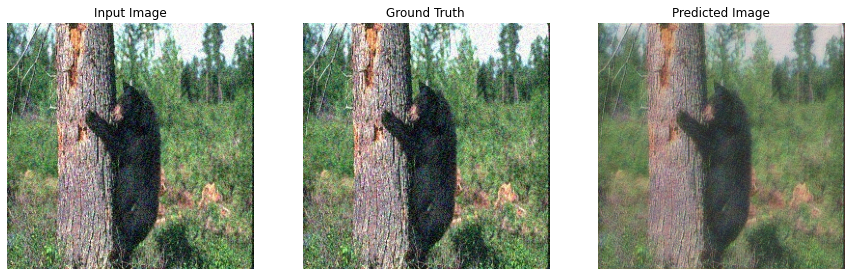

1/1 [==============================] - 0s 27ms/step


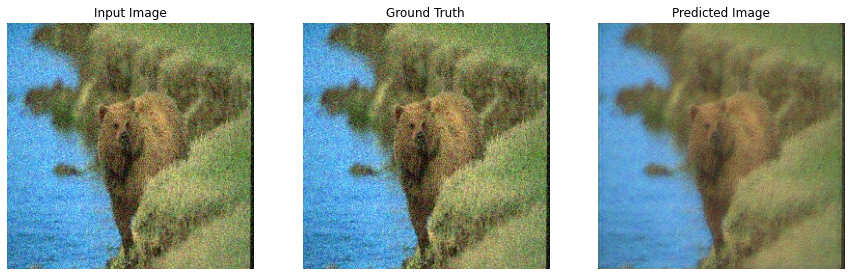

1/1 [==============================] - 0s 32ms/step


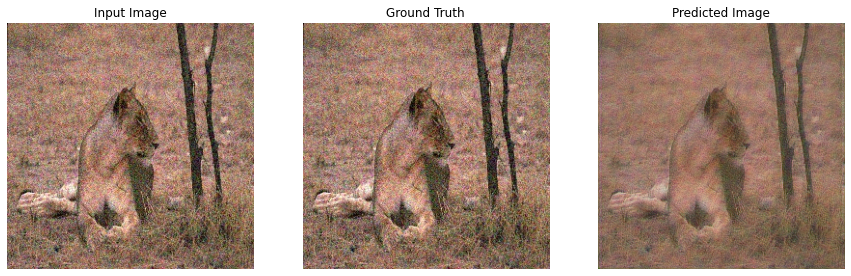

In [ ]:
#@title Visualize predictions
# for inp, tar in zip(test_gaussian_noise_images[:5], test_target_images[:5]):
#     generate_images(autoencoder, inp, tar)

for inp, tar in zip(test_gaussian_noise_images1[:5], test_gaussian_noise_images2[:5]):
    generate_images(autoencoder, inp, tar)

In [ ]:
#@title PSNR helper functions 
from math import log10, sqrt


def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


def plot_comparison(input_image, target_image, prediction):
    plt.figure(figsize=(15, 15))

    display_list = [
        input_image.astype("float32"),
        target_image.astype("float32"),
        prediction.astype("float32"),
    ]
    title = ["Input Image", "Ground Truth", "Predicted Image"]

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.title(title[i])
        plt.axis("off")
        plt.imshow(cv2.cvtColor(display_list[i], cv2.COLOR_BGR2RGB))
    plt.show()



In [ ]:
#@title SSIM Helper Functions
def SSIM(original, compressed):
    c1 = (0.01 * 255)**2
    c2 = (0.03 * 255)**2
    mu_x = np.mean(original)
    mu_y = np.mean(compressed)
    sigma_x = (np.var(original))**0.5
    sigma_y = (np.var(compressed))**0.5
    covar = np.mean(original * compressed) - mu_x*mu_y
    ssim = ((2*mu_x*mu_y + c1)*(2*covar + c2)) /((mu_x**2 + mu_y**2 + c1)*(sigma_x**2 + sigma_y**2 + c2)) 
    return ssim

In [ ]:
#@title Find mean PSNR

list_test_predictions = []
list_PSNR = []
for inp, tar in zip(test_gaussian_noise_images, test_target_images):
    prediction = autoencoder.predict(inp.reshape(-1, 256, 256, 3))
    prediction = prediction.reshape(256, 256, 3)
    list_test_predictions.append(prediction)
    list_PSNR.append(PSNR(tar, prediction))
np.array([100 - x for x in list_PSNR]).mean()

NameError: ignored

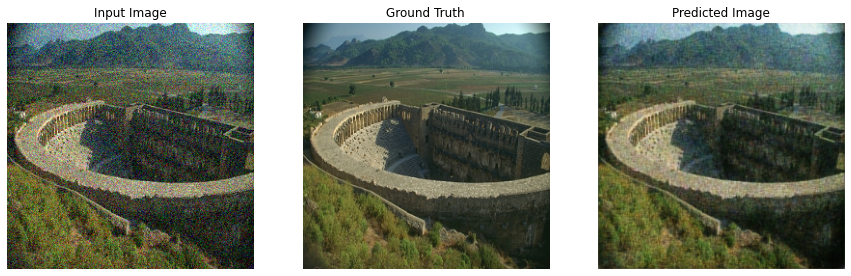

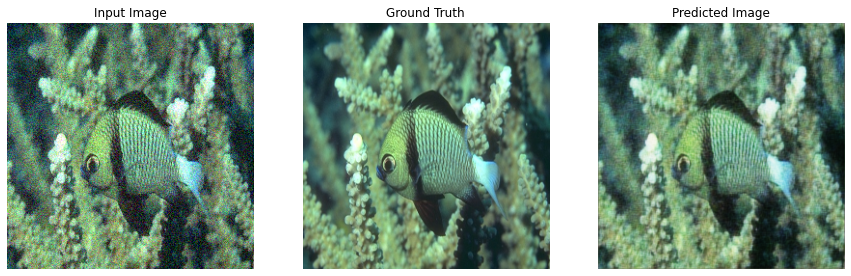

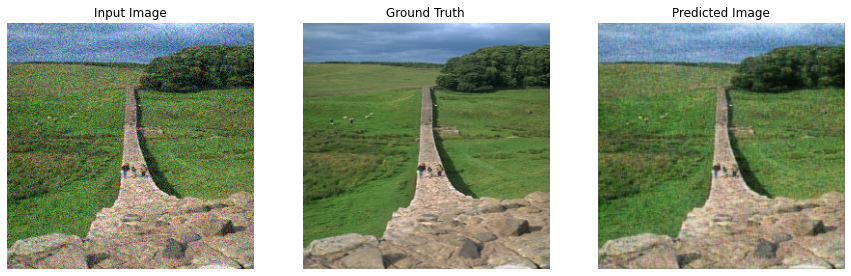

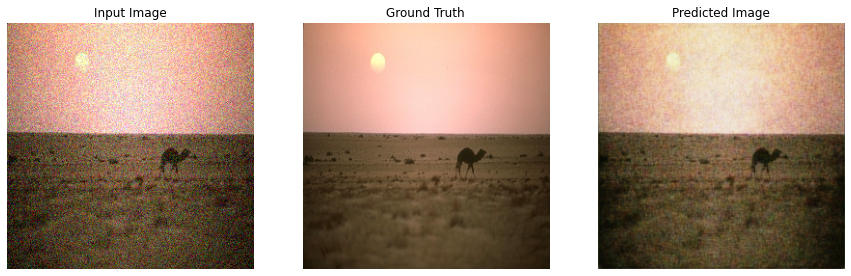

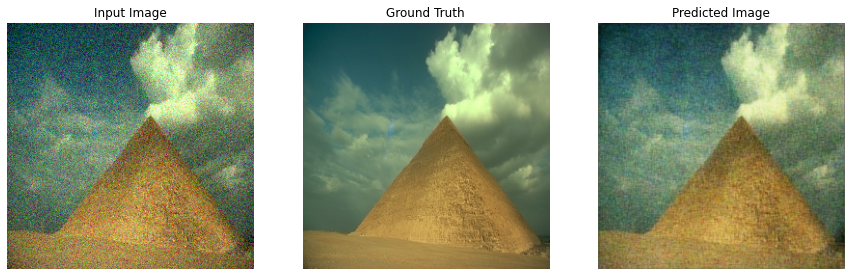

In [ ]:
#@title Plot top 5 results
for index in np.array(list_PSNR).argsort()[-5:]:
    plot_comparison(
        test_gaussian_noise_images[index],
        test_target_images[index],
        list_test_predictions[index],
    )

In [ ]:
#@title Save model
opt = "yes" #@param ["yes", "no"]
name = "baseline" #@param [""] {allow-input: true}
!mkdir models
opt = input("Do you want to save the model[yes/no]?")
if opt == "yes":
    fileName = "models/" + name +".h"
    if os.path.isfile(fileName) is False:
        autoencoder.save(fileName)

Do you want to save the model[yes/no]?yes


In [ ]:
#@title Save tf lite 
converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)
